# Compute the free energy by direct minimisation using a customised clique complex probability
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Content**
Summary of the progress so far.
- Optimisation for customised clique complex probability
- Comparision of free energy calculation methods
- HCP vs phase randomised data

**Import functions and data**

In [49]:
# Import necessary libraries
import numpy as np
import glob

# Import external background functions
%run Week_16_functions.py

In [2]:
# Import HCP data
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

**Plot optimisation for custom clique complex probability** ~13min computation time for num_iterations = 10000, N_simulations = 100, cutoff = 0.7 and max_dim = 3

In [3]:
matrix = matrices[1]
cutoff = 0.7
max_dim = 3

In [18]:
# Example for generating energy and entropy data from a given matrix
num_iterations_free_energy = 1000
free_energies = []
free_energy_probabilities_test = []
N_simulations = 10

for _ in range(N_simulations):
    clique_complex = build_clique_complex_new(matrix, cutoff, max_dim)
    inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)[1]
    initial_probabilities = generate_probability_list(clique_complex, 'custom')
    free_energy_history, f_probabilities = simulated_annealing_free_energy(clique_complex, inverse_connectivity_matrix, num_iterations_free_energy, initial_temperature=1.0, cooling_rate=0.95)

    # Store probabilities type
    free_energies.append(free_energy_history)
    free_energy_probabilities_test.append(f_probabilities)

free_energies_average = [sum(x) / len(x) for x in zip(*free_energies)]
free_energy_probabilities_test_average = [sum(x) / len(x) for x in zip(*free_energy_probabilities_test)]

In [19]:
simplices_length = nodes_probabilities(clique_complex, distribution_type='custom')[0]

N_nodes = len(simplices_length[0])
N_edges = len(simplices_length[1])
N_triangles = len(simplices_length[2])

# Define the x-values to mark the transition
marker_x_values = [N_nodes, (N_nodes+N_edges), (N_nodes+N_edges+N_triangles)]

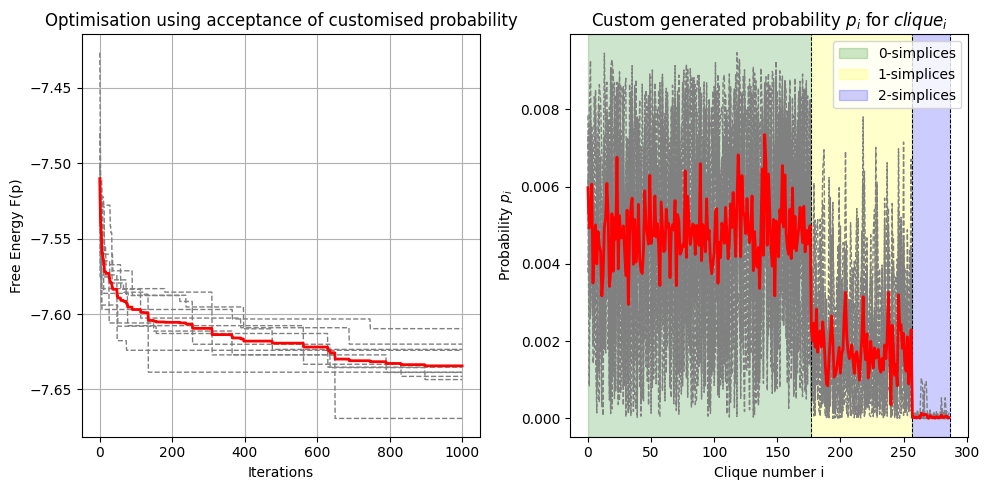

In [20]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(N_simulations):
    plt.plot(free_energies[i], color='grey', linestyle='--', linewidth=1)
plt.plot(free_energies_average, color='red', linestyle='-', linewidth = 2)
plt.title('Optimisation using acceptance of customised probability')
plt.xlabel('Iterations')
plt.ylabel('Free Energy F(p)')
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(N_simulations):
    plt.plot(free_energy_probabilities_test[i], color='grey', linestyle='--', linewidth=1)

# Add markers at the specified x-values
for marker_x in marker_x_values:
    plt.axvline(x=marker_x, color='black', linestyle='--', linewidth = 0.7)  # Add vertical dashed lines

# Plot averaged probabilities
plt.plot(free_energy_probabilities_test_average, color='red', linestyle='-', linewidth=2)

# Add colored background regions
plt.axvspan(xmin=0, xmax=N_nodes, alpha=0.2, color='green', label='0-simplices')
plt.axvspan(xmin=N_nodes, xmax=(N_nodes+N_edges), alpha=0.2, color='yellow', label='1-simplices')
plt.axvspan(xmin=(N_nodes+N_edges), xmax=(N_nodes+N_edges+N_triangles), alpha=0.2, color='blue', label='2-simplices')

plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Custom generated probability $p_i$ for $clique_i$')
plt.legend()
#plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Histogram overview of free energy calculation methods**  ~22min computation time for all matrices (811) with num_iterations = 100, cutoff = 0.7, max_dim = 3

In [52]:
free_energy_analytical = []
free_energy_direct_custom = []

cutoff = 0.7
max_dim = 3

for matrix in matrices:
    # Compute analytical free energy
    max_entropy_value, min_energy_value = analytical_functionals(matrix, cutoff, max_dim)
    free_energy_subject_3 = min_energy_value - max_entropy_value
    free_energy_analytical.append(free_energy_subject_3)

    # Compute direct free energy
    clique_complex, free_energy_subject_4, f_probabilities = computing_functionals_direct_custom(matrix, cutoff, max_dim)
    free_energy_direct_custom.append(free_energy_subject_4)

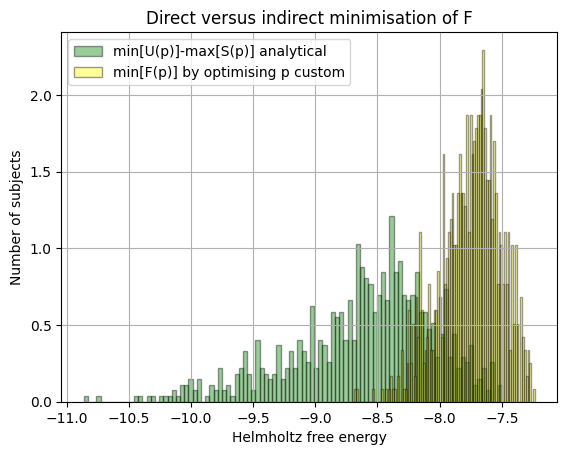

In [53]:
plt.hist(free_energy_analytical, bins=100, density=True, alpha=0.4, color='green', edgecolor='black', label = 'min[U(p)]-max[S(p)] analytical')
plt.hist(free_energy_direct_custom, bins=100, density=True, alpha=0.4, color='yellow', edgecolor='black', label = 'min[F(p)] by optimising p custom')
plt.grid(True)
plt.title('Direct versus indirect minimisation of F')
plt.ylabel('Number of subjects')
plt.xlabel('Helmholtz free energy')
plt.legend()
plt.show()

# Compare to PR-data

In [46]:
# Import PR-HCP data
matrices_PR = [np.genfromtxt(file) for file in glob.glob('Cyril\PR_CorreMatrixes\*.txt')]

In [60]:
PR_free_energy_analytical = []
PR_free_energy_direct_custom = []

cutoff = 0.99
max_dim = 3

for matrix in matrices_PR[:10]:
    # Compute analytical free energy
    max_entropy_value, min_energy_value = analytical_functionals(matrix, cutoff, max_dim)
    free_energy_subject_3 = min_energy_value - max_entropy_value
    PR_free_energy_analytical.append(free_energy_subject_3)

    # Compute direct free energy
    clique_complex, free_energy_subject_4, f_probabilities = computing_functionals_direct_custom(matrix, cutoff, max_dim)
    PR_free_energy_direct_custom.append(free_energy_subject_4)

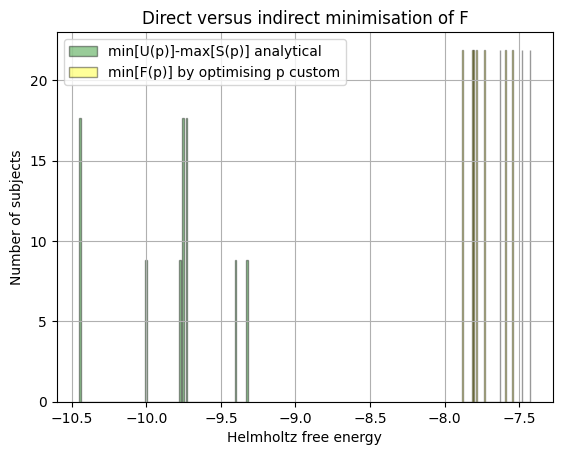

In [61]:
plt.hist(PR_free_energy_analytical, bins=100, density=True, alpha=0.4, color='green', edgecolor='black', label = 'min[U(p)]-max[S(p)] analytical')
plt.hist(PR_free_energy_direct_custom, bins=100, density=True, alpha=0.4, color='yellow', edgecolor='black', label = 'min[F(p)] by optimising p custom')
plt.grid(True)
plt.title('Direct versus indirect minimisation of F')
plt.ylabel('Number of subjects')
plt.xlabel('Helmholtz free energy')
plt.legend()
plt.show()

# Generate pruned matrix from time series data using phased randomisation

In [ ]:
import pandas as pd
import numpy as np
import glob

In [ ]:
def phase_randomization(time_series):
    # Compute the Fourier transform of the time series
    fourier_transform = np.fft.fft(time_series)

    # Get the phases of the Fourier transform
    phases = np.angle(fourier_transform)

    # Shuffle the phases randomly
    np.random.shuffle(phases)

    # Apply the shuffled phases to the Fourier transform
    randomized_fourier_transform = np.abs(fourier_transform) * np.exp(1j * phases)

    # Reconstruct the randomized time series
    randomized_time_series = np.fft.ifft(randomized_fourier_transform)

    # Return the randomized time series
    return randomized_time_series.real

def phase_randomization_dataframe(df):
    df_dropped = df.drop(df.columns[-1], axis=1)  # Drop the last column from the dataframe

    randomized_df = pd.DataFrame()  # Create an empty dataframe to store the randomized data
    for _, row in df_dropped.iterrows():
        randomized_row = phase_randomization(row.values)  # Apply phase randomization to each row
        randomized_df = randomized_df.append(pd.Series(randomized_row), ignore_index=True)  # Add randomized row to the dataframe
    randomized_df.columns = df_dropped.columns  # Assign the column names to the randomized dataframe
    return randomized_df

In [ ]:
def phase_randomization_dataframe(df):
    #
    randomized_series = []  # Use a list to store the randomized data

    for _, row in df.iterrows():
        randomized_row = phase_randomization(row.values)
        randomized_series.append(pd.Series(randomized_row))  # Add randomized row to the list

    # Use concat to combine all the series into a dataframe
    randomized_df = pd.concat(randomized_series, axis=1).transpose()
    randomized_df.columns = df.columns  # Assign the column names to the randomized dataframe
    return randomized_df

In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2E77-A41D

 Directory of c:\Users\cyril\Documents\MSc Physics and Astronomy\Thesis\GitHub\Free_energy_of_simplicial_complexes

08/03/2024  11:20    <DIR>          .
08/03/2024  10:26    <DIR>          ..
08/03/2024  13:05    <DIR>          .git
08/03/2024  11:20    <DIR>          __pycache__
08/03/2024  10:26    <DIR>          1000_Functional_Connectomes
08/03/2024  11:20            16.825 background_functions.py
20/02/2024  15:12               118 compiler.py
08/03/2024  11:20           354.746 Complete_progress.ipynb
08/03/2024  12:08    <DIR>          Concept_codes
08/02/2024  11:58            33.799 Connection_matrix.ipynb
08/03/2024  11:01    <DIR>          Cyril
08/03/2024  11:20           521.802 Cyril_con_graph.ipynb
08/02/2024  11:58           119.360 Energy_calculation.ipynb
08/03/2024  11:20            15.356 Energy_data.ipynb
08/03/2024  11:20           232.428 Energy_minimisation.ipynb
08/03/2024  11:20           399.573 Es

In [ ]:
path=glob.glob('HCPYoungAdultDerivatives/*/*/*/*/*Schaefer2018*100P*.txt')

In [ ]:
df=pd.read_csv(path[0],sep='\t',header=None)

In [ ]:
df.to_csv('PR_HCP/PR'+path[0][-103:])

In [ ]:
for file in path:
    df=pd.read_csv(file,sep='\t',header=None)
    phase_randomization_dataframe(df)
    df.to_csv('PR_HCP/PR'+file[-103:])